In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.display.width= None
pd.options.display.max_columns= None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)

sns.set_palette('colorblind')

%matplotlib inline

C:\Users\ntlg4\anaconda3\envs\travelinsurance\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
DATA = './data/travel_insurance.csv'
travel_df = pd.read_csv(DATA)
travel_df.head()
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


# Analysis of Our Customers

### Transform the boolean columns to Yes/No 

In [3]:
travel_df['TravelInsurance'] = travel_df['TravelInsurance'].map({0:'No', 1:'Yes'})
travel_df['ChronicDiseases'] = travel_df['ChronicDiseases'].map({0:'No', 1:'Yes'})
travel_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Yes
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,No


### What age range are our customers?

In [4]:
print("Minimum age: ", min(travel_df.Age))
print("Maximum age: ", max(travel_df.Age))

Minimum age:  25
Maximum age:  35


Our customer age range is between 25-35 years old

### Distribution of Our Customers

Text(0.5, 1.0, 'Age Distribution of Clients')

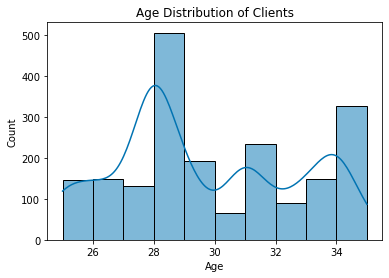

In [5]:
sns.histplot(data = travel_df, x = 'Age', bins = 10, kde = True)
plt.title("Age Distribution of Clients")

In [6]:
travel_df['Age'].value_counts()

28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64

We see that a lot of our clientele is over the age of 28

### Comparison of who owns a policy and who does not

Text(0.5, 1.0, 'Who Has Travel Insurance?')

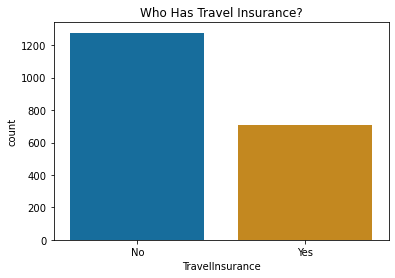

In [7]:
sns.countplot(data = travel_df, x= 'TravelInsurance')
plt.title("Who Has Travel Insurance?")

We see that a significant portion of our clients do not have a policy with Travel Assured

### Distribution of Clients Who Have A Policy By Age

Text(0.5, 1.0, 'Count of Clients By Age Who Have Travel Insurance')

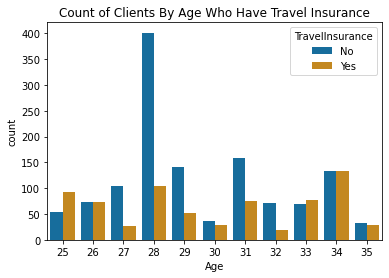

In [8]:
sns.countplot(data = travel_df, x = 'Age', hue = 'TravelInsurance')
plt.title("Count of Clients By Age Who Have Travel Insurance")


Text(0.5, 1.0, 'Distribution of Clients By Age Who Have Travel Insurance')

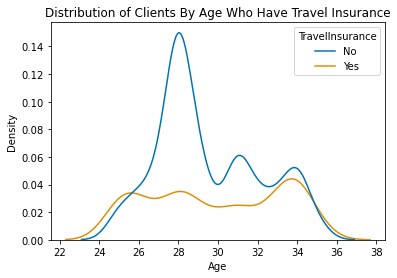

In [9]:
sns.kdeplot(data = travel_df, x = 'Age', hue = 'TravelInsurance')
plt.title("Distribution of Clients By Age Who Have Travel Insurance")

From here, we see the majority of our clients who are 28 years old do not have a travel insurance policy with Travel Assured. Majority of our clients who do have a policy are 32-35 years old based on our data

### Distribution of Clients By Employment Type

Text(0.5, 1.0, 'Distribution of Clients Who Have Travel Insurance')

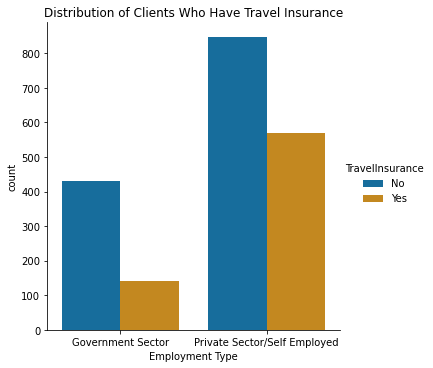

In [10]:
sns.catplot(data = travel_df, x = 'Employment Type', kind = 'count', hue = 'TravelInsurance')
plt.title('Distribution of Clients Who Have Travel Insurance')

We see in this visual that most of our clients that purchase a policy with Travel Assured 

### Distribution of Graduates Who Purchase a Travel Insurance Policy

Text(0.5, 1.0, 'Distribution of Graduates')

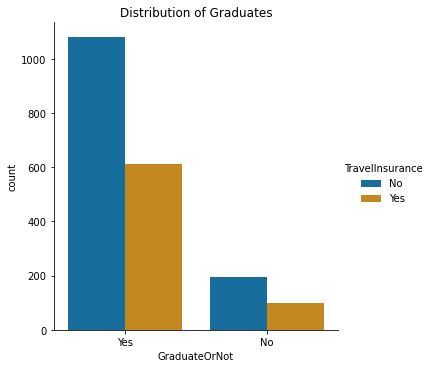

In [11]:
sns.catplot(data = travel_df, x = 'GraduateOrNot', kind = 'count', hue = 'TravelInsurance')
plt.title('Distribution of Graduates')

In this visual, it appears that more graduates will purchase a policy than non-graduates

### Distribution of Travel Insurance By Annual Income

<AxesSubplot:xlabel='AnnualIncome', ylabel='Count'>

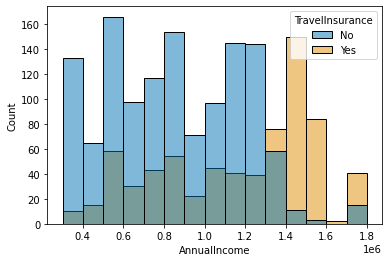

In [12]:
sns.histplot(data = travel_df, x = 'AnnualIncome', hue = 'TravelInsurance')

Text(0.5, 1.0, 'Distribution of Client Income')

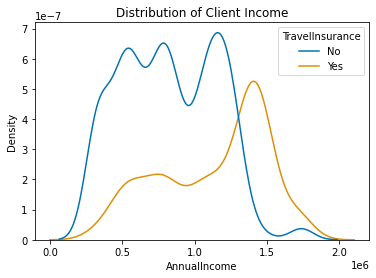

In [21]:
sns.kdeplot(data = travel_df, x = 'AnnualIncome', hue = 'TravelInsurance')
plt.title('Distribution of Client Income')

We see that there is a spike of travel insurance policies bought around the $1.3 million income area and higher

### Distribution of Clients With Chronic Disease Who Have a Travel Insurance Policy

Text(0.5, 1.0, 'Distribution of Clients with Chronic Disease')

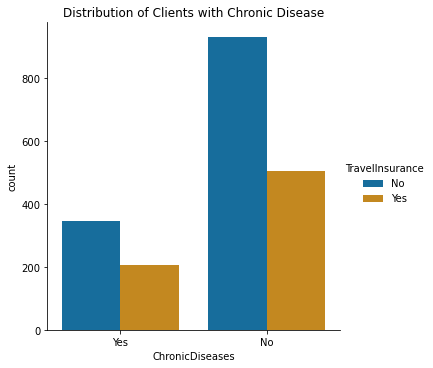

In [14]:
sns.catplot(data = travel_df, x = 'ChronicDiseases', kind = 'count', hue = 'TravelInsurance')
plt.title('Distribution of Clients with Chronic Disease')

### Distribution of Clients With a Travel Policy Vs. Number of Family Members

Text(0.5, 1.0, 'Distribution of Clients With a Travel Policy vs. Number of Family Members')

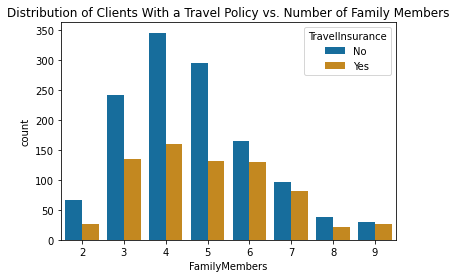

In [15]:
sns.countplot(data=travel_df, x = 'FamilyMembers', hue = 'TravelInsurance')
plt.title("Distribution of Clients With a Travel Policy vs. Number of Family Members")

<AxesSubplot:xlabel='FamilyMembers', ylabel='Density'>

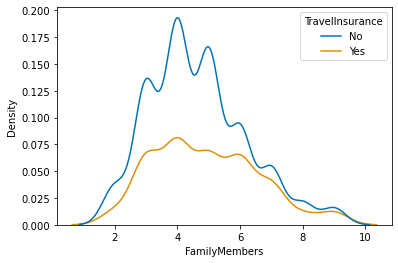

In [16]:
sns.kdeplot(data=travel_df, x = 'FamilyMembers', hue = 'TravelInsurance')

We see here it is mostly clients with families of sizes 3 to 7 that have a travel insurance policy

### Frequent Fliers Who Have Travel Insurance

Text(0.5, 1.0, 'Distribution of Frequent Fliers With Travel Insurance')

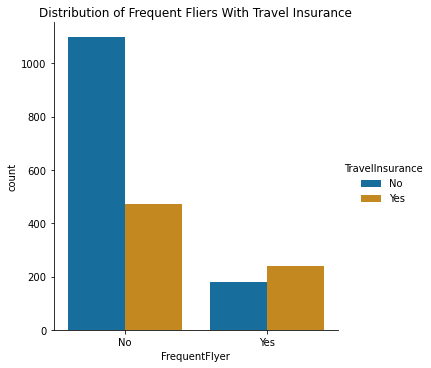

In [17]:
sns.catplot(data=travel_df, x = 'FrequentFlyer', kind = 'count', hue = 'TravelInsurance')
plt.title("Distribution of Frequent Fliers With Travel Insurance")

While we see that there is a large number of non-frequent fliers who have travel insurance, it is also seen here that the frequent fliers tend to purchase travel insurance more than not purchase travel insurance

### Travelling Abroad Travel Insurance

Text(0.5, 1.0, 'Distribution of Abroad Travellers With Travel Insurance')

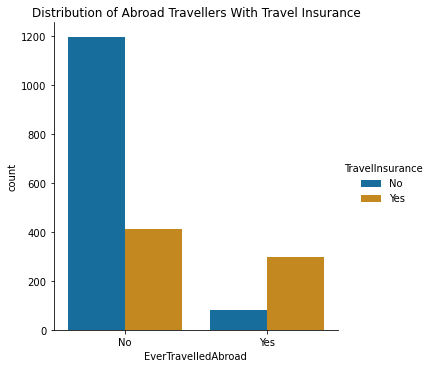

In [18]:
sns.catplot(data=travel_df, x = 'EverTravelledAbroad', kind = 'count', hue = 'TravelInsurance')
plt.title("Distribution of Abroad Travellers With Travel Insurance")